In [345]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [335]:
from datetime import datetime
import os
import numpy as np
import imageio
import scipy.io
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
chars = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [16]:
small_folder = './notMNIST_small'
large_folder = './notMNIST_large'

In [134]:
small_orig_mat = './notMNIST_small_orig.mat'
large_orig_mat = './notMNIST_large_orig.mat'
small_uniq_mat = './notMNIST_small_uniq.mat'
large_uniq_mat = './notMNIST_large_uniq.mat'
large_clean_mat = './notMNIST_large_clean.mat'

In [28]:
def folder_to_mat(folder, output_file):
    data = {}
    start = datetime.now()
    for ch in chars:
        char_images = list()
        char_img_path = f'{folder}/{ch}'

        print(f'Reading "{ch}"')

        for r, d, f in os.walk(char_img_path):
            for file in f:
                if '.png' in file:
                    file_path = os.path.join(r, file)
                    try:
                        img = imageio.imread(file_path)
                        char_images.append(img.reshape(-1))
                    except (OSError, ValueError) as e:
                        #print(e)
                        print('Bad file:', file_path)
        data[ch] = np.array(char_images)
    end = datetime.now()
    time_diff = (end - start).total_seconds()
    print(f'{end.strftime("%H:%M:%S")} it took: {time_diff}\'s')
    scipy.io.savemat(output_file, data)

In [29]:
folder_to_mat(small_folder, small_orig_mat)

Reading "A"
Bad file: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
Reading "B"
Reading "C"
Reading "D"
Reading "E"
Reading "F"
Bad file: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png
Reading "G"
Reading "H"
Reading "I"
Reading "J"
21:15:42 it took: 7.583626's


In [30]:
folder_to_mat(large_folder, large_orig_mat)

Reading "A"
Bad file: ./notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png
Bad file: ./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png
Bad file: ./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png
Reading "B"
Bad file: ./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png
Reading "C"
Reading "D"
Bad file: ./notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png
Reading "E"
Reading "F"
Reading "G"
Reading "H"
Reading "I"
Reading "J"
21:22:58 it took: 395.27648's


In [51]:
def remove_duplicates(data):
    uniq_data = {}
    total_start = datetime.now()
    for ch in chars:
        start = datetime.now()
        print('------')
        print(f'{start.strftime("%H:%M:%S")}: Uniq: "{ch}"')
        uniq_data[ch] = np.unique(data[ch], axis=0)
        end = datetime.now()
        time_diff = (end - start).total_seconds()
        print(f'{end.strftime("%H:%M:%S")}: "{ch}" - diff: {len(data[ch]) - len(uniq_data[ch])}\t took: {time_diff}')

    total_end = datetime.now()
    total_time_diff = (total_end - total_start).total_seconds()
    print(f'\n{total_end.strftime("%H:%M:%S")} it took: {total_time_diff}\'s')
    return uniq_data

In [52]:
small_orig_data = scipy.io.loadmat(small_orig_mat)

In [53]:
small_uniq_data = remove_duplicates(small_orig_data)

------
21:35:22: Uniq: "A"
21:35:22: "A" - diff: 24	 took: 0.015762
------
21:35:22: Uniq: "B"
21:35:22: "B" - diff: 20	 took: 0.012835
------
21:35:22: Uniq: "C"
21:35:22: "C" - diff: 24	 took: 0.01398
------
21:35:22: Uniq: "D"
21:35:22: "D" - diff: 26	 took: 0.01098
------
21:35:22: Uniq: "E"
21:35:22: "E" - diff: 26	 took: 0.014779
------
21:35:22: Uniq: "F"
21:35:22: "F" - diff: 22	 took: 0.013029
------
21:35:22: Uniq: "G"
21:35:22: "G" - diff: 21	 took: 0.011523
------
21:35:22: Uniq: "H"
21:35:22: "H" - diff: 26	 took: 0.010218
------
21:35:22: Uniq: "I"
21:35:22: "I" - diff: 275	 took: 0.043348
------
21:35:22: Uniq: "J"
21:35:22: "J" - diff: 22	 took: 0.015949

21:35:22 it took: 0.163384's


In [54]:
scipy.io.savemat(small_uniq_mat, small_uniq_data)

In [55]:
large_orig_data = scipy.io.loadmat(large_orig_mat)

In [56]:
large_uniq_data = remove_duplicates(large_orig_data)

------
21:39:22: Uniq: "A"
21:39:22: "A" - diff: 5807	 took: 0.795365
------
21:39:22: Uniq: "B"
21:39:23: "B" - diff: 5630	 took: 0.558981
------
21:39:23: Uniq: "C"
21:39:24: "C" - diff: 6258	 took: 0.618774
------
21:39:24: Uniq: "D"
21:39:24: "D" - diff: 6180	 took: 0.569035
------
21:39:24: Uniq: "E"
21:39:25: "E" - diff: 5958	 took: 0.577547
------
21:39:25: Uniq: "F"
21:39:25: "F" - diff: 6068	 took: 0.579709
------
21:39:25: Uniq: "G"
21:39:26: "G" - diff: 5822	 took: 0.604438
------
21:39:26: Uniq: "H"
21:39:27: "H" - diff: 6730	 took: 0.641705
------
21:39:27: Uniq: "I"
21:39:28: "I" - diff: 11739	 took: 1.915712
------
21:39:28: Uniq: "J"
21:39:30: "J" - diff: 6253	 took: 1.193399

21:39:30 it took: 8.056471's


In [57]:
scipy.io.savemat(large_uniq_mat, large_uniq_data)

In [123]:
def setdiff2d(a_arr, b_arr):
    a_rows = a_arr.view([('', a_arr.dtype)] * a_arr.shape[1])
    b_rows = b_arr.view([('', b_arr.dtype)] * b_arr.shape[1])
    return np.setdiff1d(a_rows, b_rows, assume_unique=True).view(a_arr.dtype).reshape(-1, a_arr.shape[1])

In [131]:
def remove_intersections(remove_from, source):
    clean_data = {}
    total_start = datetime.now()
    for ch in chars:
        start = datetime.now()
        print('------')
        print(f'{start.strftime("%H:%M:%S")}: Uniq: "{ch}"')
        clean_data[ch] = setdiff2d(remove_from[ch], source[ch])
        end = datetime.now()
        time_diff = (end - start).total_seconds()
        print(f'{end.strftime("%H:%M:%S")}: "{ch}" - diff: {len(remove_from[ch]) - len(clean_data[ch])}\t took: {time_diff}')

    total_end = datetime.now()
    total_time_diff = (total_end - total_start).total_seconds()
    print(f'\n{total_end.strftime("%H:%M:%S")} it took: {total_time_diff}\'s')
    return clean_data

In [132]:
large_clean_data = remove_intersections(large_uniq_data, small_uniq_data)

------
23:01:41: Uniq: "A"
23:01:43: "A" - diff: 450	 took: 1.252596
------
23:01:43: Uniq: "B"
23:01:44: "B" - diff: 429	 took: 1.290194
------
23:01:44: Uniq: "C"
23:01:45: "C" - diff: 469	 took: 1.186779
------
23:01:45: Uniq: "D"
23:01:47: "D" - diff: 467	 took: 1.322485
------
23:01:47: Uniq: "E"
23:01:48: "E" - diff: 457	 took: 1.415042
------
23:01:48: Uniq: "F"
23:01:49: "F" - diff: 461	 took: 1.234455
------
23:01:49: Uniq: "G"
23:01:50: "G" - diff: 444	 took: 1.269038
------
23:01:50: Uniq: "H"
23:01:51: "H" - diff: 505	 took: 1.023126
------
23:01:51: Uniq: "I"
23:01:52: "I" - diff: 441	 took: 0.945542
------
23:01:52: Uniq: "J"
23:01:54: "J" - diff: 465	 took: 1.23689

23:01:54 it took: 12.17776's


In [135]:
scipy.io.savemat(large_clean_mat, large_clean_data)

**Задание 1**

Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [175]:
def print_numbers(data):
    fig = plt.figure(figsize=(20, 5))

    for i,ch in enumerate(chars):
        img = data[ch][np.random.randint(data[ch].shape[0])]
        fig.add_subplot(1, len(chars), i +1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(ch)
        plt.axis('off')

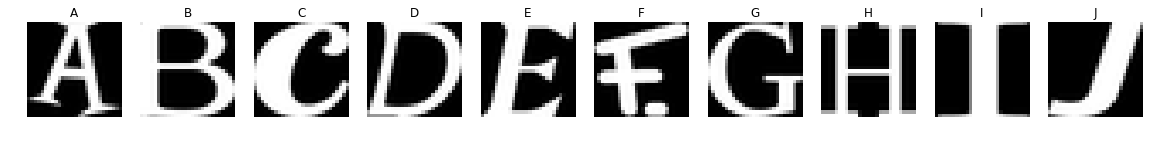

In [177]:
print_numbers(small_uniq_data)

**Задание 2.**

Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

In [206]:
def display_balance(data):
    fig = plt.figure(figsize=(20, 5))
    plt.rc('font', size=22)   
    
    counts = list()
    
    for ch in chars:
        counts.append(len(data[ch]))
        print(f'{ch}\t', end='')

    print('')
    
    for c in counts:
        print(f'{c}\t', end='')
    
    print('')
        
    ax = fig.add_axes([0,0,1,1])
    ax.bar(chars, counts, width=0.6)

A	B	C	D	E	F	G	H	I	J	
1872	1873	1873	1873	1873	1872	1872	1872	1872	1872	


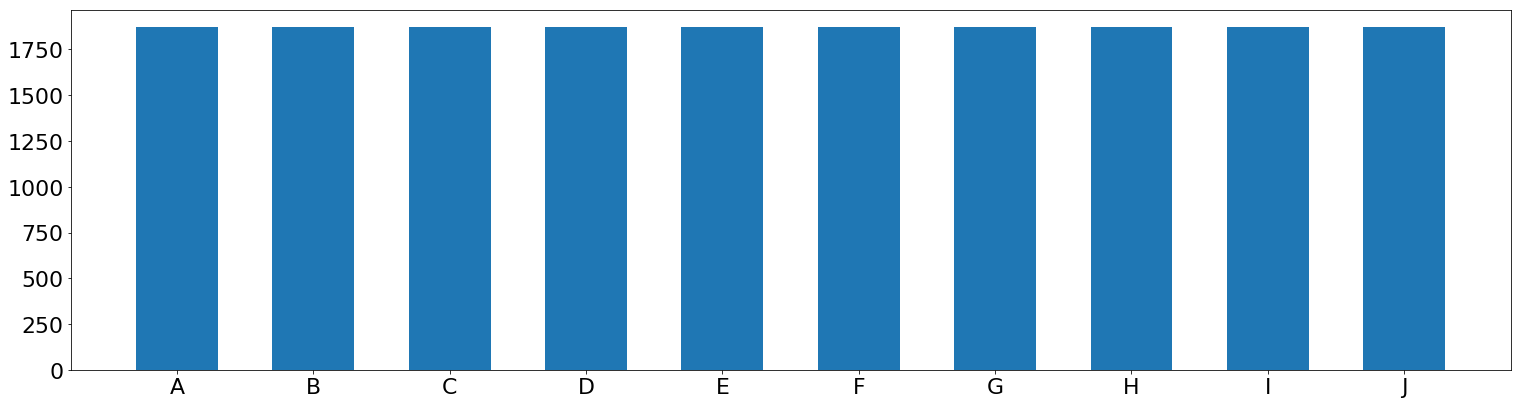

In [497]:
display_balance(small_orig_data)

A	B	C	D	E	F	G	H	I	J	
1848	1853	1849	1847	1847	1850	1851	1846	1597	1850	


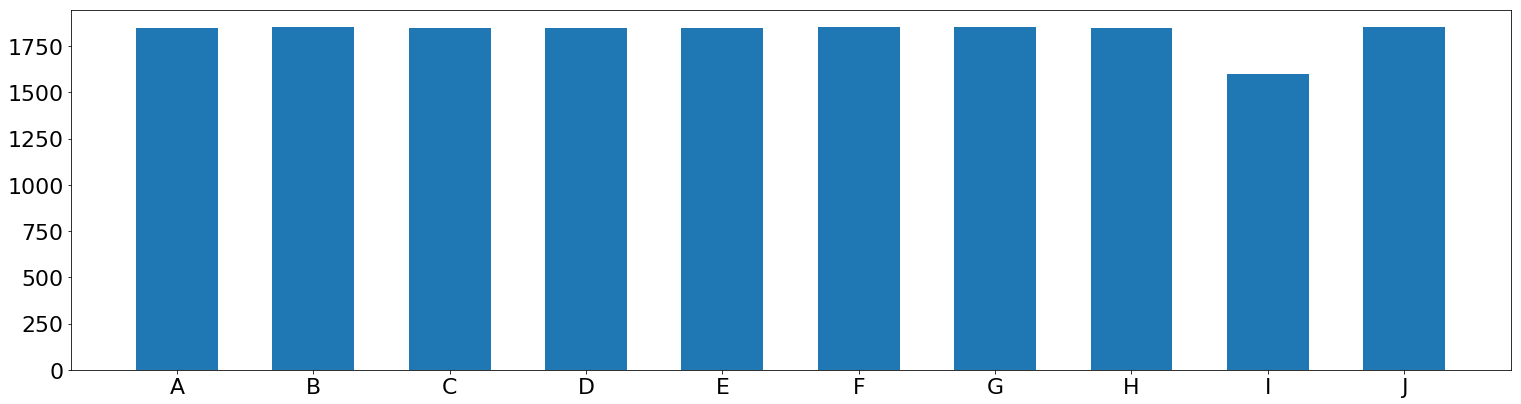

In [498]:
display_balance(small_uniq_data)

Оригинальный датасет

A	B	C	D	E	F	G	H	I	J	
52909	52911	52912	52911	52912	52912	52912	52912	52912	52911	


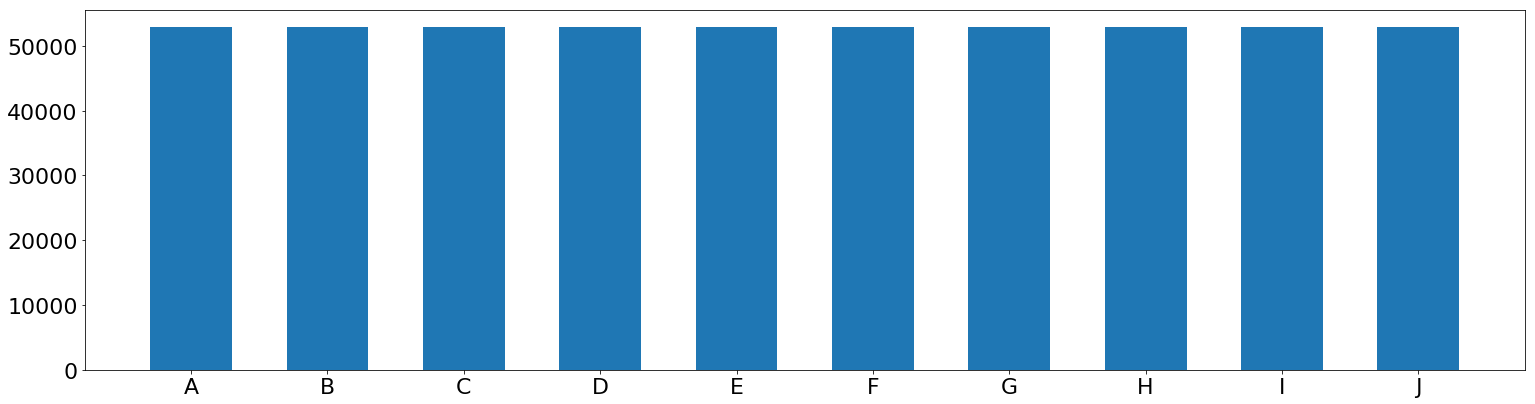

In [208]:
display_balance(large_orig_data)

Датасет без дубликатов

A	B	C	D	E	F	G	H	I	J	
47102	47281	46654	46731	46954	46844	47090	46182	41173	46658	


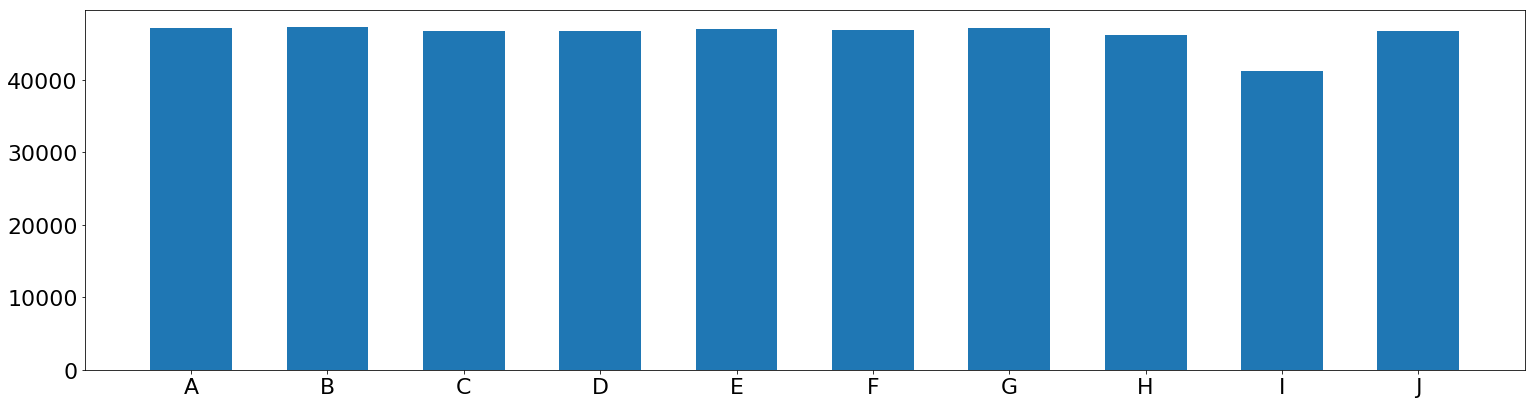

In [209]:
display_balance(large_uniq_data)

Датасет без дубликатов и без дубликатов из small датасета (Test)

A	B	C	D	E	F	G	H	I	J	
46652	46852	46185	46264	46497	46383	46646	45677	40732	46193	


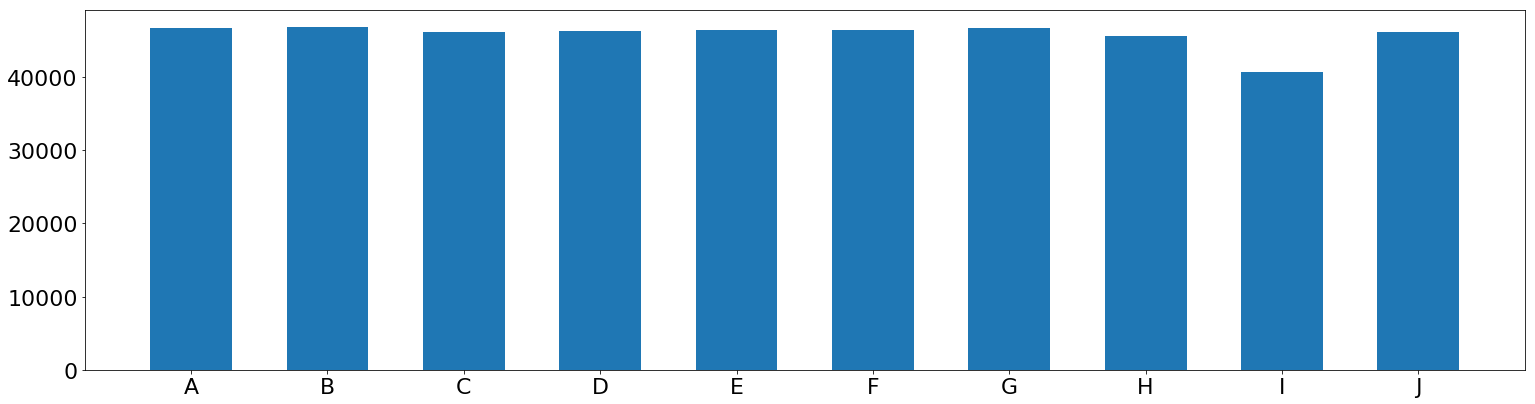

In [210]:
display_balance(large_clean_data)

In [401]:
def prepare_dataset(dataset, records=None):
    data = list()
    labels = list()

#    lb = preprocessing.LabelBinarizer()
    lb = preprocessing.LabelEncoder()
    lb.fit(chars)
    if records:
        one = int(records / len(chars))
        #check
        for ch in chars:
            ch_len = len(dataset[ch])
            assert ch_len >= one, f'"{ch}" has {ch_len} items but required {one}'
        #print(one)
        for ch in chars:
            indexes = np.random.choice(len(dataset[ch]), one)
            picked_elements = dataset[ch][indexes] / 255
            data.extend(picked_elements)
            labels.extend(np.tile(lb.transform([ch])[0], (one, 1)))
    else:
        for ch in chars:
            data.extend(dataset[ch]/255)
            labels.extend(np.tile(lb.transform([ch])[0], (len(dataset[ch]), 1)))
    
    data = np.array(data)
    labels = np.array(labels).reshape(-1)
    
    return resample(data, labels)

In [436]:
experiments = {
    '50': {'train': 50, 'valid': 20},
    '100': {'train': 100, 'valid': 40},
   '1000': {'train': 1000, 'valid': 400},
    '5000': {'train': 5000, 'valid': 1000},
    '20000': {'train': 20000, 'valid': 1800},
    '50000': {'train': 50000, 'valid': 2500},
    '100000': {'train': 100000, 'valid': 5000},
    '200000': {'train': 200000, 'valid': 10000},
}

In [439]:
experiments_data = {}
for ex in experiments:
    data_count = experiments[ex]['train'] + experiments[ex]['valid']
    prep_X, prep_y = prepare_dataset(large_clean_data, records=data_count)
    X_train, X_valid, y_train, y_valid = train_test_split(prep_X, prep_y, test_size=experiments[ex]['valid'], random_state=50)
    experiments_data[ex] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_valid': X_valid,
        'y_valid': y_valid,
    }

In [444]:
experiments_results = {}

for ex in experiments:
    start_time = datetime.now()
    print(f'{start_time.strftime("%H:%M:%S")}: Start experiment: {ex}')
    
    experiment = experiments_data[ex]
          
    model = LogisticRegression(solver='lbfgs', n_jobs=8, C=2,random_state=60)
    #model = LogisticRegression(random_state=60)
    model.fit(experiment['X_train'], experiment['y_train'])
          
    experiments_results[ex] = {
        'model': model,
        'train_score': model.score(experiment['X_train'], experiment['y_train']),
        'valid_score': model.score(experiment['X_valid'], experiment['y_valid']),
    }
          
    end_time = datetime.now()
    print(f'{end_time.strftime("%H:%M:%S")}: finish experiment: {ex}')

    time_diff = (end_time - start_time).total_seconds()
    print(f'It took: {time_diff} s.\n')

17:19:59: Start experiment: 50
17:20:01: finish experiment: 50
It took: 2.215231 s.

17:20:01: Start experiment: 100
17:20:01: finish experiment: 100
It took: 0.076231 s.

17:20:01: Start experiment: 1000
17:20:03: finish experiment: 1000
It took: 1.347186 s.

17:20:03: Start experiment: 5000
17:20:16: finish experiment: 5000
It took: 13.818749 s.

17:20:16: Start experiment: 20000


/Users/ls/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


17:21:16: finish experiment: 20000
It took: 59.152758 s.

17:21:16: Start experiment: 50000
17:25:35: finish experiment: 50000
It took: 259.434955 s.

17:25:35: Start experiment: 100000
17:26:59: finish experiment: 100000
It took: 84.417467 s.

17:26:59: Start experiment: 200000
17:29:32: finish experiment: 200000
It took: 152.440317 s.



In [445]:
experiments_results

{'50': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_start=False),
  'train_score': 1.0,
  'valid_score': 0.95},
 '100': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_start=False),
  'train_score': 1.0,
  'valid_score': 0.8},
 '1000': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_start=False),
  'train_score': 1.0,
  'valid_score': 0.9075},
 '5000': {'m

In [446]:
X_test, y_test = prepare_dataset(small_uniq_data)
X_test.shape

(18238, 784)

In [447]:
for res in experiments_results:
    experiments_results[res]['test_score'] = experiments_results[res]['model'].score(X_test, y_test)

In [448]:
experiments_results

{'50': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_start=False),
  'train_score': 1.0,
  'valid_score': 0.95,
  'test_score': 0.6021493584822897},
 '100': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_start=False),
  'train_score': 1.0,
  'valid_score': 0.8,
  'test_score': 0.7220638227875864},
 '1000': {'model': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=8,
            penalty='l2', random_state=60, solver='lbfgs', tol=0.0001,
            verbose=0, warm_st

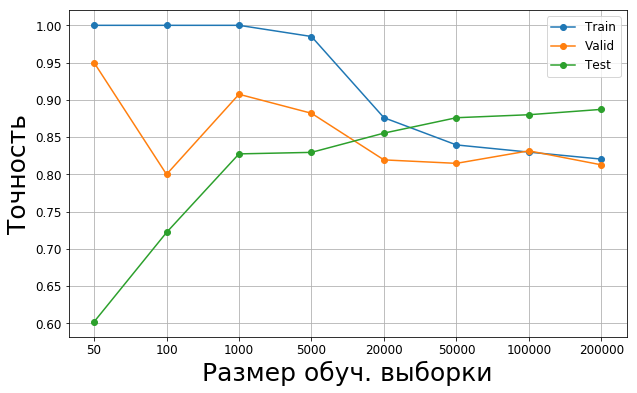

In [496]:
x_labels = list()
y_train_score = list()
y_valid_score = list()
y_test_score = list()

for res in experiments_results:
    x_labels.append(res)
    y_train_score.append(experiments_results[res]['train_score'])
    y_valid_score.append(experiments_results[res]['valid_score'])
    y_test_score.append(experiments_results[res]['test_score'])
    

plt.rc('font', size=12)
plt.figure(figsize=(10,6))
plt.plot(x_labels, y_train_score, 'o-', label='Train')
plt.plot(x_labels, y_valid_score, 'o-', label='Valid')
plt.plot(x_labels, y_test_score, 'o-', label='Test')
plt.grid(True)
plt.xlabel("Размер обуч. выборки", fontsize=25)
plt.ylabel("Точность", fontsize=25)
plt.legend()
plt.show()